Author : Ruchit Vithani <br>
ID : 201701070<br>
Lab 6 : Topics in DL<br>
Date : 11-06-2020<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Contour plot of function** 

$f(x, y) = (x + 1.5 - y)^2 + (2.5 + x - xy^2)^2 + (2.625 - x + xy^3)^2$

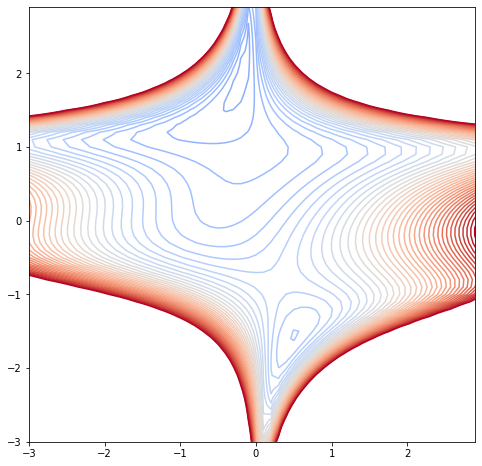

In [2]:
def f(x, y):
    return (x+1.5-y)**2 + (2.5 + x - x*y**2)**2 + (2.625 - x + x*y**3)**2

def df_dx(x, y):
    return 2*(x + 1.5 - y) + (2*(2.5 + x - x*y**2)*(1 - y**2)) + (2*(2.625 - x + x*y**3)*(-1 + y**3))

def df_dy(x, y):
    return 2*(x + 1.5 - y)*(-1) + 2*(2.5 + x - x*y**2)*(-2*x*y) + 2*(2.625 - x + x*y**3)*(3*x*y**2)

def grad(w):
    x, y = w
    dx, dy =  2*(x + 1.5 - y) + (2*(2.5 + x - x*y**2)*(1 - y**2)) + (2*(2.625 - x + x*y**3)*(-1 + y**3)), 2*(x + 1.5 - y)*(-1) + 2*(2.5 + x - x*y**2)*(-2*x*y) + 2*(2.625 - x + x*y**3)*(3*x*y**2)
    return np.array([dx, dy])

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

plt.figure(figsize=(8, 8))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.show()

# **SGD**

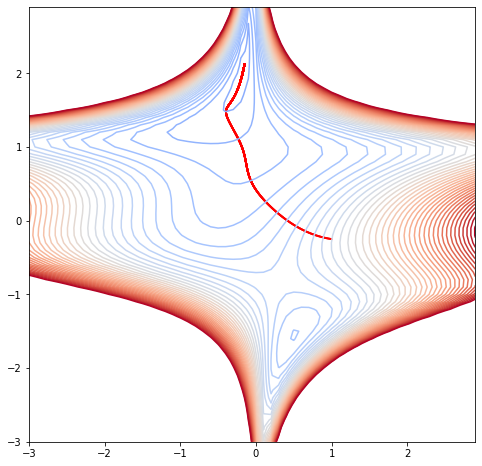

In [3]:
def sgd(x, y, lr):
    points = []
    W = np.array([x, y])
    points.append(W)
    distances = []

    for i in range(10000):
        W_new = W - lr*grad(W)
        points.append(W_new)
        distances.append(W_new - W)
        W = W_new

    return np.array(points[:-1]).T, np.array(distances).T

pnts, dists = sgd(1, -0.25, 1e-3)
plt.figure(figsize=(8, 8))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.quiver(pnts[0], pnts[1], dists[0], dists[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='r')
plt.show()

pnts_sgd = pnts
dists_sgd = dists

# **SGD with momentum**

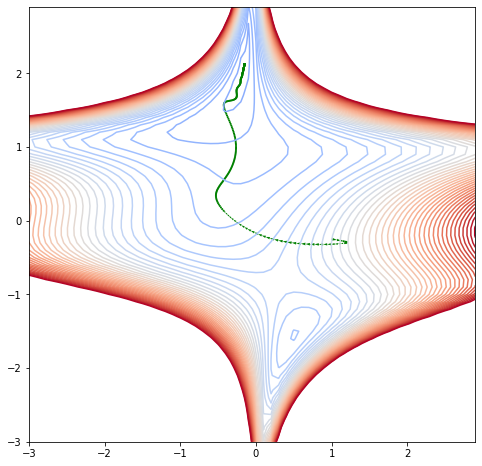

In [4]:
def momentum(x, y, gamma, lr):
    points = []
    W = np.array([x, y])
    dW = grad(W)
    points.append(W)
    distances = []
    for i in range(10000):
        dW_new = gamma*dW + (1-gamma)*(-grad(W))
        W_new = W + lr*dW_new

        points.append(W_new)
        distances.append(W_new - W)

        W = W_new
        dW = dW_new

    return np.array(points[:-1]).T, np.array(distances).T

pnts, dists = momentum(1, -0.25, 0.9, 1e-2)
plt.figure(figsize=(8, 8))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.quiver(pnts[0], pnts[1], dists[0], dists[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='g')
plt.show()

pnts_momentum = pnts
dists_momentum = dists

# **Nesterov**

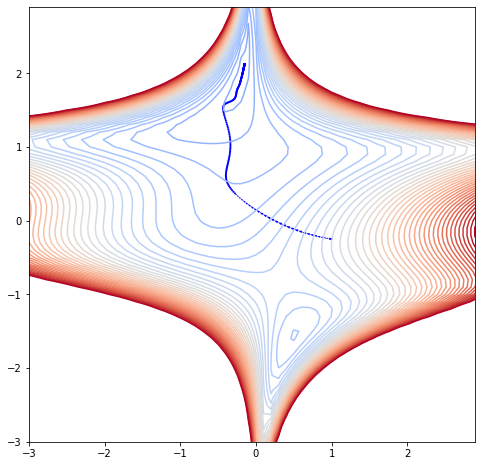

In [5]:
def nesterov(x, y, beta, lr):   
    points = []
    points.append(np.array([x, y]))
    distances = []

    d_prev = np.array([0, 0])
    W = points[-1]
    for i in range(10000):
        W_adv = W + beta*d_prev
        d_curr = beta*d_prev - lr*(grad(W_adv))
        W_new = W + d_curr

        points.append(W_new)
        distances.append(W_new - W)

        W = W_new
        d_prev = d_curr

    return np.array(points[:-1]).T, np.array(distances).T

pnts, dists = nesterov(1, -0.25, 0.9, 1e-3)
plt.figure(figsize=(8, 8))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.quiver(pnts[0], pnts[1], dists[0], dists[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='b')
plt.show()

pnts_nesterov = pnts
dists_nesterov = dists

# **Adagrad**

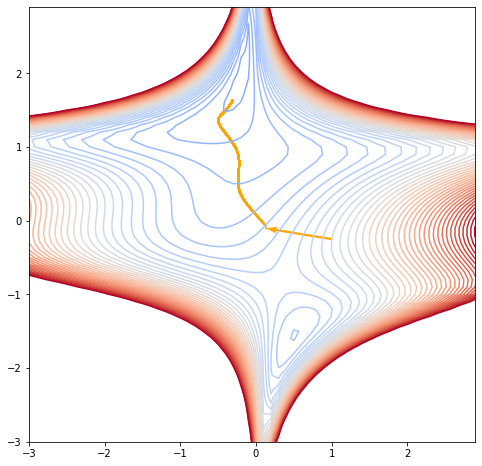

In [6]:
def adagrad(x, y, lr, e):
    points = []
    points.append(np.array([x, y]))
    distances = []

    G = np.array([0.01, 0.01])
    W = points[-1]
    for i in range(10000):
        gradient = grad(W)
        W_new = W - (lr/(np.sqrt(G + e)))*gradient

        G += gradient**2
        
        points.append(W)
        distances.append(W_new - W)

        W = W_new
    
    return np.array(points[:-1]).T, np.array(distances).T

pnts, dists = adagrad(1, -0.25, 1e-2,1e-8)
plt.figure(figsize=(8, 8))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.quiver(pnts[0], pnts[1], dists[0], dists[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='orange')
plt.show()

pnts_adagrad = pnts
dists_adagrad = dists

# **RMSProp**

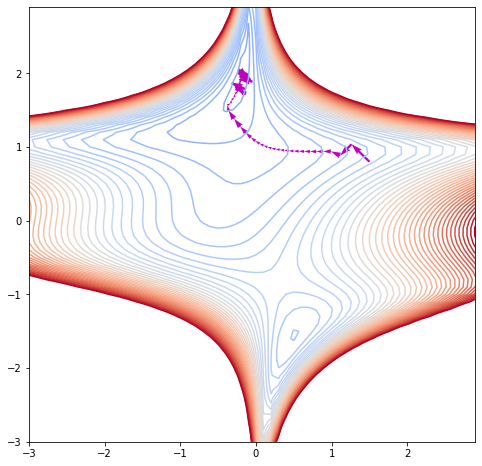

In [7]:
def rms_prop(x, y, lr, beta, e):
    points = []
    points.append(np.array([x, y]))
    distances = []

    h = np.array([0.01, 0.01])
    W = points[-1]
    for i in range(10000):
        h_new = beta*h + (1-beta)*(grad(W))**2
        W_new = W - lr*(grad(W)/np.sqrt(h_new + e))

        points.append(W_new)
        distances.append(W_new - W)
        h = h_new
        W = W_new
    
    return np.array(points[:-1]).T, np.array(distances).T

pnts, dists = rms_prop(1.5, 0.8, 7.5e-2, 0.9, 1e-8)
plt.figure(figsize=(8, 8))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.quiver(pnts[0], pnts[1], dists[0], dists[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='m')
plt.show()

pnts_rmsprop = pnts
dists_rmsprop = dists

# **Adam**

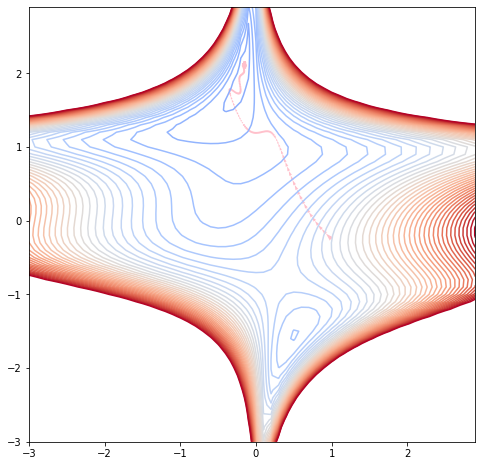

In [8]:
def adam(x, y, lr, beta1, beta2, e):
    points = []
    points.append(np.array([x, y]))
    distances = []

    W = points[-1]    
    d = grad(W)
    h = grad(W)**2

    for i in range(10000):
        gradient = grad(W)

        d = beta1*d + (1-beta1)*(gradient)
        h = beta2*h + (1-beta2)*(np.power(gradient,2))

        dc = np.divide(d,(1-np.power(beta1,i+1)))
        hc = np.divide(h,(1-np.power(beta2,i+1)))
        W_new = W - lr*np.divide(dc,np.sqrt(hc)+e)
        points.append(W_new)

        distances.append(W_new - W)
        W = W_new
        

    return np.array(points[:-1]).T, np.array(distances).T

pnts, dists = adam(1, -0.25, 7.5e-2, 0.9, 0.99, 1e-8)
plt.figure(figsize=(8, 8))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.quiver(pnts[0], pnts[1], dists[0], dists[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='pink')
plt.show()

pnts_adam = pnts
dists_adam = dists

# **Visualising all optimizers on a single contour plot**

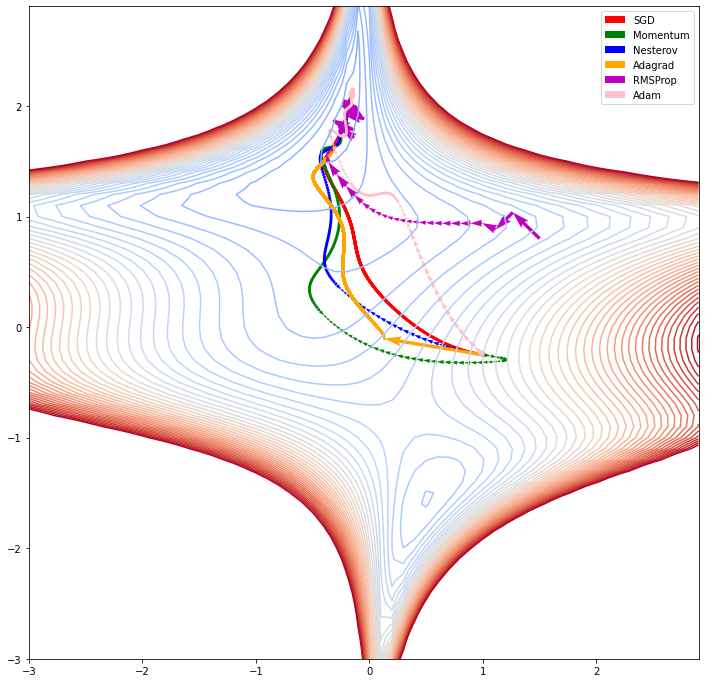

In [9]:
legend = ["SGD", "Momentum", "Nesterov", "Adagrad", "RMSProp", "Adam"]
plt.figure(figsize=(12, 12))
plt.contour(x, y, Z, levels=np.arange(0, 50, 1), cmap="coolwarm")
plt.quiver(pnts_sgd[0], pnts_sgd[1], dists_sgd[0], dists_sgd[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='r')
plt.quiver(pnts_momentum[0], pnts_momentum[1], dists_momentum[0], dists_momentum[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='g')
plt.quiver(pnts_nesterov[0], pnts_nesterov[1], dists_nesterov[0], dists_nesterov[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='b')
plt.quiver(pnts_adagrad[0], pnts_adagrad[1], dists_adagrad[0], dists_adagrad[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='orange')
plt.quiver(pnts_rmsprop[0], pnts_rmsprop[1], dists_rmsprop[0], dists_rmsprop[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='m')
plt.quiver(pnts_adam[0], pnts_adam[1], dists_adam[0], dists_adam[1], scale=1, angles='xy', scale_units='xy', width=0.005,  color='pink')
plt.legend(legend)
plt.show()


# **Visualising convergence**

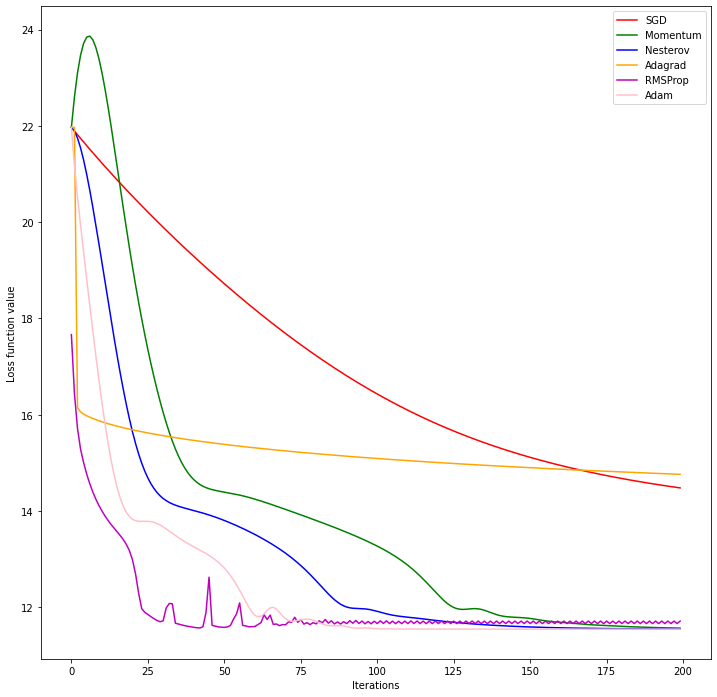

In [10]:
pnts_list = [pnts_sgd, pnts_momentum, pnts_nesterov, pnts_adagrad, pnts_rmsprop, pnts_adam]
colors = ['r', 'g', 'b', 'orange', 'm', 'pink']
plt.figure(figsize=(12, 12))
for i, pnts in enumerate(pnts_list):
    loss = f(pnts[0][:200], pnts[1][:200])
    plt.plot(loss, color = colors[i])
plt.legend(legend)
plt.xlabel("Iterations")
plt.ylabel("Loss function value")
plt.show()
    

# **Comparative analysis**

1. Momentum based GD overshoots initially, but very soon starts to converge faster than SGD.
2. Nesterov accelerated GD improves over momentum based gradient descent. 
3. Remaininng methods RMSProp and adam are apparently very good optimizers compared to other optimizers. 

# **Justification**

1. When using momentum, the momentum term increases when the direction of movement is same as previous move. This way, the convergence becomes faster, and hence we see that it eventually converges faster than SGD. 
2. In momentum based GD, we update the point based on momentum term. The movement becomes faster as far as the point is moving in the same direction, but there is no notion of when to slow down in momentum based GD.

    In nesterov GD, we calculate gradient beforehand wrt approximate future position. So unlike momentum, it first takes a big jump in the direction of accumulated gradient, measures the gradient, and then updates the parameters (momentum first computes gradient and then takes a big jump, so there is no mechanism of slowing down in momentum based GD, and that is the reason we see several overshoots in momentum based GD.) The resultant update in nesterov helps the optimizer in slowing down the updates in the parameters. 

3. Adagrad updates the learning rates over time during training. As we can see, adagrad initially makes a big jump, but very soon, the step size becomes too small that it is extremely difficult for the model to train. This is because of accumulated gradients (which is strictly increasing function.). 

4. RMSProp and Adam solve the diminishing learning rate problem of adagrad. RMSProp does not accumulate all gradients like adagrad. It takes exponentially decaying average of past gradients (this way, it gives more weights to recent gradients and less to weights in past). Thus we see that it plays better than Adagrad. 

5. Adam : It combines the idea of momentum and RMSProp in one optimizer. It accumulates exponentially decaying average of both gradients (like momentum) and squared gradients(like RMSProp). So we expect it to perform better than SGD and momentum. In many cases it also performs better than RMSProp, but in this particular case, RMSProp is little better. 


